In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
image_resolution = 384

In [3]:
car1_images = []
for i in range(360):
    image_path = "Car1Rotations\car1_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    car1_images.append(input_arr)
car1_images = np.array(car1_images)

In [4]:
car1_images = car1_images.reshape((360, 384, 384, 1))

In [12]:
target =np.array([float(i) for i in range(360)])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(car1_images, target, test_size=float(1)/9, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=11)
print("X train: {}".format(X_train.shape))
print("y train: {}".format(y_train.shape))
print("X val: {}".format(X_val.shape))
print("y val: {}".format(y_val.shape))
print("X test: {}".format(X_test.shape))
print("y test: {}".format(y_test.shape))

X train: (280, 384, 384, 1)
y train: (280,)
X val: (40, 384, 384, 1)
y val: (40,)
X test: (40, 384, 384, 1)
y test: (40,)


In [26]:
def loss_function(y_true, y_pred):   
    # If the prediction is < 0
    mask1 = tf.less(y_pred, float(0))
    mask1 = tf.dtypes.cast(mask1, tf.float32)
    
    # If the prediction is > 360
    mask2 = tf.less(float(360), y_pred)
    mask2 = tf.dtypes.cast(mask2, tf.float32)
    
    case1 = tf.minimum(tf.abs(tf.subtract(y_true, y_pred)), tf.subtract(float(360), tf.abs(tf.subtract(y_true, y_pred))))
    case2 = tf.add(tf.abs(tf.subtract(y_true, y_pred)), tf.multiply(float(10), (tf.subtract(float(0), y_pred))))
    case3 = tf.add(tf.abs(tf.subtract(y_true, y_pred)), tf.multiply(float(10), (tf.subtract(y_pred, float(360)))))
    
    result = (1 - mask1)*(1 - mask2)*case1 + mask1*case2 + mask2*case3
    return result

In [35]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (12, 12), strides=(2,2), padding='valid', activation='relu', input_shape=(384, 384,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32,   (6, 6), strides=(1,1),  padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 187, 187, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 93, 93, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               17334528  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

In [36]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=adam_optimizer,
              loss=loss_function)

history = model.fit(X_train,y_train, epochs=40, validation_data=(X_val,y_val), batch_size=8)

Epoch 1/40
35/35 [==============================] - 19s 545ms/step - loss: 114.2867 - val_loss: 80.4874
Epoch 2/40
35/35 [==============================] - 18s 516ms/step - loss: 89.7724 - val_loss: 93.6369
Epoch 3/40
35/35 [==============================] - 16s 463ms/step - loss: 90.4861 - val_loss: 88.3955
Epoch 4/40
35/35 [==============================] - 17s 492ms/step - loss: 85.3440 - val_loss: 78.8161
Epoch 5/40
35/35 [==============================] - 17s 492ms/step - loss: 79.2505 - val_loss: 68.0715
Epoch 6/40
35/35 [==============================] - 18s 500ms/step - loss: 77.8082 - val_loss: 68.0194
Epoch 7/40
35/35 [==============================] - 17s 490ms/step - loss: 80.9361 - val_loss: 55.6747
Epoch 8/40
35/35 [==============================] - 17s 489ms/step - loss: 83.3160 - val_loss: 66.0925
Epoch 9/40
35/35 [==============================] - 17s 487ms/step - loss: 79.3847 - val_loss: 77.1315
Epoch 10/40
35/35 [==============================] - 17s 492ms/step - lo

In [37]:
test_predictions = model.predict(X_test)

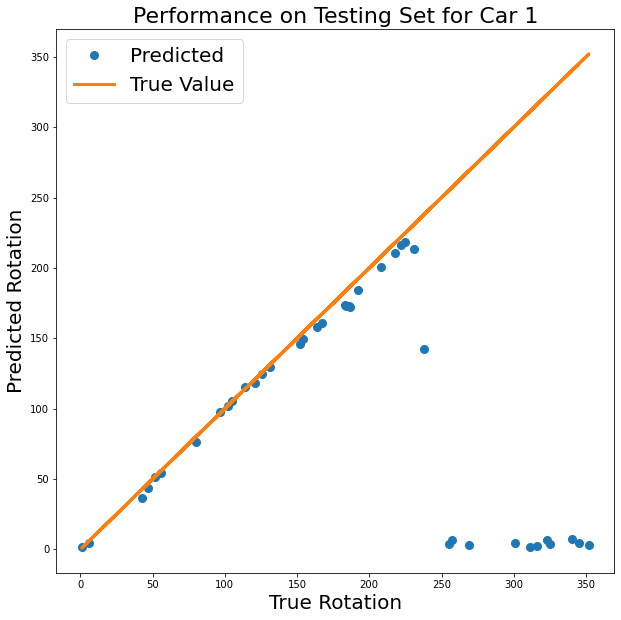

In [38]:
size = len(y_test)
plt.figure(figsize=(10,10))
plt.plot(y_test, list(test_predictions), 'o', label='Predicted', ms=8)
plt.plot(y_test, y_test, label='True Value', lw=3)
plt.xlabel("True Rotation", fontsize=20)
plt.ylabel("Predicted Rotation", fontsize=20)
plt.legend(fontsize=20)
plt.title("Performance on Testing Set for Car 1", fontsize=22)
plt.show()

In [57]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 85ms/step - loss: 272.0613


272.06134033203125

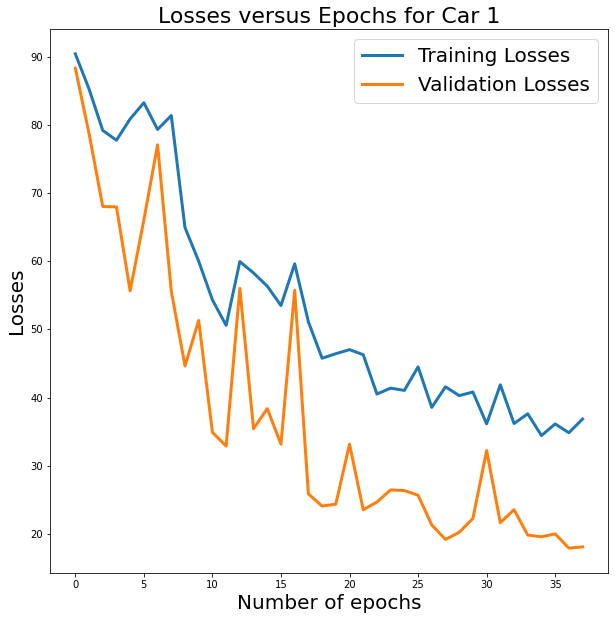

In [39]:
losses = history.history['loss'][2:]
val_losses = history.history['val_loss'][2:]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses)), losses, lw=3, label='Training Losses')
plt.plot(range(len(losses)), val_losses, lw=3, label='Validation Losses')
plt.ylabel("Losses", fontsize=20)
plt.xlabel("Number of epochs", fontsize=20)
plt.legend(fontsize=20)
plt.title("Losses versus Epochs for Car 1", fontsize=22)
plt.show()

# Training on Multiple Cars

In [40]:
data = []
target = []
for i in range(360):
    image_path = "Car1Rotations\car1_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)

for i in range(360):
    image_path = "Car2Rotations\car2_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)

for i in range(360):
    image_path = "Car3Rotations\car3_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)

for i in range(360):
    image_path = "Car4Rotations\car4_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)
    
data = np.array(data)
target = np.array(target)

In [45]:
data = data.reshape((1440, 384, 384, 1))

print(data.shape)
print(target.shape)

(1440, 384, 384, 1)
(1440,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=float(1)/12, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=float(1)/11, random_state=234)
print("X train: {}".format(X_train.shape))
print("y train: {}".format(y_train.shape))
print("X val: {}".format(X_val.shape))
print("y val: {}".format(y_val.shape))
print("X test: {}".format(X_test.shape))
print("y test: {}".format(y_test.shape))

X train: (1200, 384, 384, 1)
y train: (1200,)
X val: (120, 384, 384, 1)
y val: (120,)
X test: (120, 384, 384, 1)
y test: (120,)


In [47]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (12, 12), strides=(2,2), padding='valid', activation='relu', input_shape=(384, 384,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32,   (6, 6), strides=(1,1),  padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 187, 187, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 93, 93, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               17334528  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

In [48]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=adam_optimizer,
              loss='mean_squared_error')

history = model.fit(X_train,y_train, epochs=40, validation_data=(X_val,y_val), batch_size=8)

Epoch 1/40
150/150 [==============================] - 79s 529ms/step - loss: 9214.4570 - val_loss: 2652.1016
Epoch 2/40
150/150 [==============================] - 75s 497ms/step - loss: 2085.7961 - val_loss: 999.8672
Epoch 3/40
150/150 [==============================] - 77s 513ms/step - loss: 1107.8953 - val_loss: 732.0453
Epoch 4/40
150/150 [==============================] - 85s 564ms/step - loss: 724.4987 - val_loss: 509.5905
Epoch 5/40
150/150 [==============================] - 89s 593ms/step - loss: 581.6857 - val_loss: 420.3845
Epoch 6/40
150/150 [==============================] - 87s 583ms/step - loss: 468.8405 - val_loss: 446.9941
Epoch 7/40
150/150 [==============================] - 88s 588ms/step - loss: 432.7910 - val_loss: 1308.9473
Epoch 8/40
150/150 [==============================] - 88s 589ms/step - loss: 434.6219 - val_loss: 239.7473
Epoch 9/40
150/150 [==============================] - 88s 589ms/step - loss: 322.9385 - val_loss: 231.6733
Epoch 10/40
150/150 [===========

In [49]:
test_predictions = model.predict(X_test)

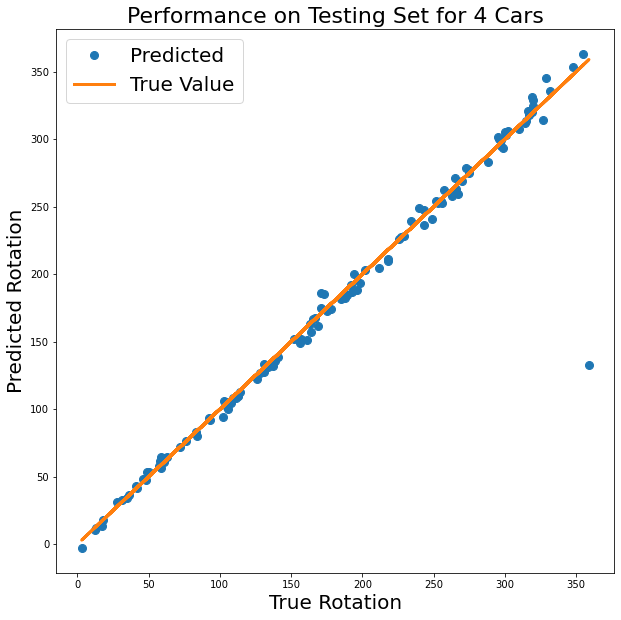

In [52]:
size = len(y_test)
plt.figure(figsize=(10,10))
plt.plot(y_test, list(test_predictions), 'o', label='Predicted', ms=8)
plt.plot(y_test, y_test, label='True Value', lw=3)
plt.xlabel("True Rotation", fontsize=20)
plt.ylabel("Predicted Rotation", fontsize=20)
plt.legend(fontsize=20)
plt.title("Performance on Testing Set for 4 Cars", fontsize=22)
plt.show()

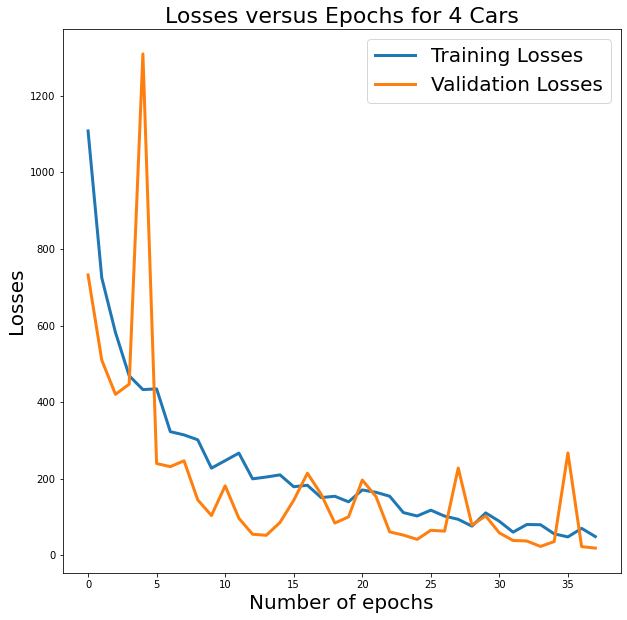

In [53]:
losses = history.history['loss'][2:]
val_losses = history.history['val_loss'][2:]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses)), losses, lw=3, label='Training Losses')
plt.plot(range(len(losses)), val_losses, lw=3, label='Validation Losses')
plt.ylabel("Losses", fontsize=20)
plt.xlabel("Number of epochs", fontsize=20)
plt.legend(fontsize=20)
plt.title("Losses versus Epochs for 4 Cars", fontsize=22)
plt.show()

# Training on 3 Cars, 1 Car is Test

In [54]:
data = []
target = []
for i in range(360):
    image_path = "Car1Rotations\car1_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)

for i in range(360):
    image_path = "Car2Rotations\car2_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)

for i in range(360):
    image_path = "Car3Rotations\car3_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)
    
data = np.array(data)
target = np.array(target)

In [56]:
data = data.reshape((1080, 384, 384, 1))

print(data.shape)
print(target.shape)

(1080, 384, 384, 1)
(1080,)


In [58]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=float(1)/12, random_state=123)
print("X train: {}".format(X_train.shape))
print("y train: {}".format(y_train.shape))
print("X val: {}".format(X_val.shape))
print("y val: {}".format(y_val.shape))

X train: (990, 384, 384, 1)
y train: (990,)
X val: (90, 384, 384, 1)
y val: (90,)


In [70]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (12, 12), strides=(2,2), padding='valid', activation='relu', input_shape=(384, 384,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32,   (6, 6), strides=(1,1),  padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 187, 187, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 93, 93, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               17334528  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

In [71]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=adam_optimizer,
              loss='mean_squared_error')

history = model.fit(X_train,y_train, epochs=40, validation_data=(X_val,y_val), batch_size=16)

Epoch 1/40
62/62 [==============================] - 61s 977ms/step - loss: 11318.0898 - val_loss: 10341.0352
Epoch 2/40
62/62 [==============================] - 61s 979ms/step - loss: 9428.5869 - val_loss: 7116.9585
Epoch 3/40
62/62 [==============================] - 63s 1s/step - loss: 6494.9683 - val_loss: 3842.3313
Epoch 4/40
62/62 [==============================] - 64s 1s/step - loss: 3461.0913 - val_loss: 2207.7041
Epoch 5/40
62/62 [==============================] - 70s 1s/step - loss: 2275.4658 - val_loss: 1763.9707
Epoch 6/40
62/62 [==============================] - 113s 2s/step - loss: 1786.2111 - val_loss: 1479.9905
Epoch 7/40
62/62 [==============================] - 64s 1s/step - loss: 1538.0024 - val_loss: 1589.1506
Epoch 8/40
62/62 [==============================] - 63s 1s/step - loss: 1400.9052 - val_loss: 1176.5668
Epoch 9/40
62/62 [==============================] - 67s 1s/step - loss: 1117.1349 - val_loss: 1081.2712
Epoch 10/40
62/62 [==============================] - 70

In [66]:
X_test = []
y_test = []
for i in range(360):
    image_path = "Car4Rotations\car4_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    X_test.append(input_arr)
    y_test.append(i)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test.reshape((360, 384, 384, 1))

In [72]:
test_predictions = model.predict(X_test)

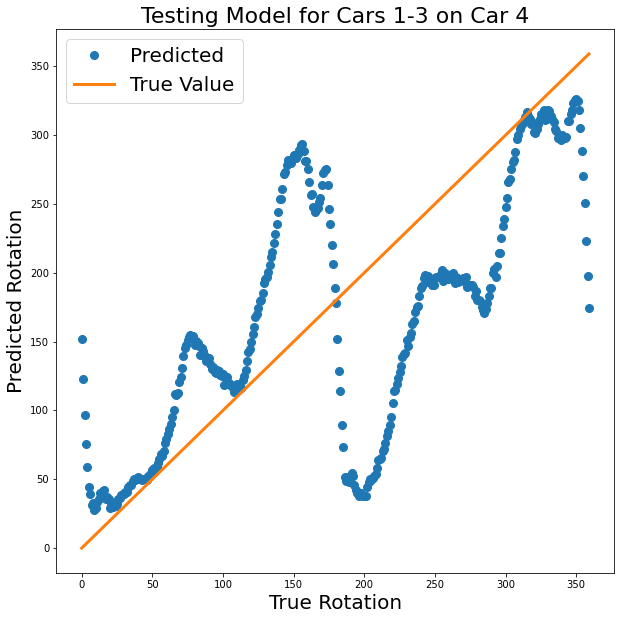

In [75]:
size = len(y_test)
plt.figure(figsize=(10,10))
plt.plot(y_test, list(test_predictions), 'o', label='Predicted', ms=8)
plt.plot(y_test, y_test, label='True Value', lw=3)
plt.xlabel("True Rotation", fontsize=20)
plt.ylabel("Predicted Rotation", fontsize=20)
plt.legend(fontsize=20)
plt.title("Testing Model for Cars 1-3 on Car 4", fontsize=22)
plt.show()

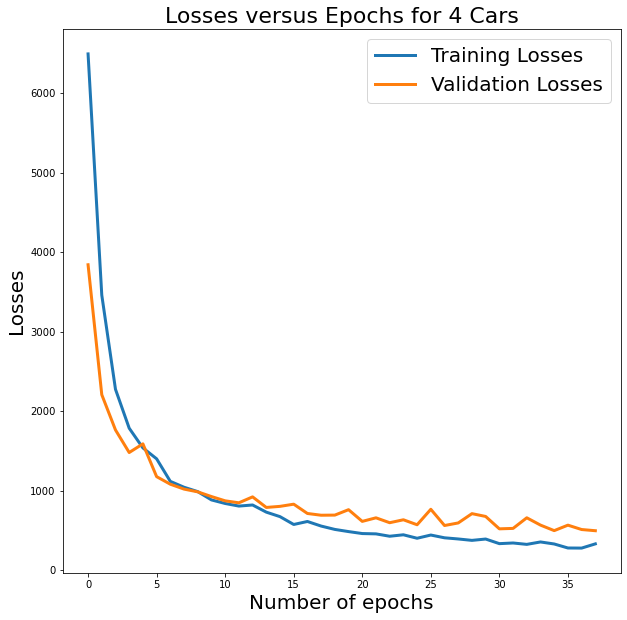

In [74]:
losses = history.history['loss'][2:]
val_losses = history.history['val_loss'][2:]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses)), losses, lw=3, label='Training Losses')
plt.plot(range(len(losses)), val_losses, lw=3, label='Validation Losses')
plt.ylabel("Losses", fontsize=20)
plt.xlabel("Number of epochs", fontsize=20)
plt.legend(fontsize=20)
plt.title("Losses versus Epochs for 4 Cars", fontsize=22)
plt.show()

# Image Differences of Multiple Cars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
image_resolution = 384

In [3]:
car1_images = []
for i in range(360):
    image_path = "Car1Rotations\car1_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    car1_images.append(input_arr)
car1_images = np.array(car1_images)

In [4]:
car1_images = car1_images.reshape((360, 384, 384, 1))

In [5]:
radians = np.linspace(0, 2*np.pi, 360) 
sines = np.sin(radians)
cosines = np.cos(radians)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(car1_images, cosines, test_size=0.20, random_state=4)

In [14]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (12, 12), strides=(2,2), padding='valid', activation='relu', input_shape=(384, 384,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32,   (6, 6), strides=(1,1),  padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 187, 187, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 93, 93, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               17334528  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

In [15]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=adam_optimizer,
              loss='mean_squared_error')

history = model.fit(X_train,y_train, epochs=40, validation_data=(X_test,y_test), batch_size=16)

Epoch 1/40
18/18 [==============================] - 17s 922ms/step - loss: 583.9128 - val_loss: 36.6790
Epoch 2/40
18/18 [==============================] - 15s 806ms/step - loss: 34.8725 - val_loss: 2.7630
Epoch 3/40
18/18 [==============================] - 15s 840ms/step - loss: 6.6895 - val_loss: 3.1523
Epoch 4/40
18/18 [==============================] - 15s 843ms/step - loss: 3.0598 - val_loss: 2.1884
Epoch 5/40
18/18 [==============================] - 15s 856ms/step - loss: 1.8252 - val_loss: 1.9636
Epoch 6/40
18/18 [==============================] - 16s 868ms/step - loss: 1.6431 - val_loss: 1.7852
Epoch 7/40
18/18 [==============================] - 16s 871ms/step - loss: 1.5345 - val_loss: 1.6315
Epoch 8/40
18/18 [==============================] - 16s 880ms/step - loss: 1.4244 - val_loss: 1.5239
Epoch 9/40
18/18 [==============================] - 16s 871ms/step - loss: 1.3008 - val_loss: 1.5146
Epoch 10/40
18/18 [==============================] - 16s 917ms/step - loss: 1.3501 - va

In [16]:
raw_predictions = model.predict(X_test)

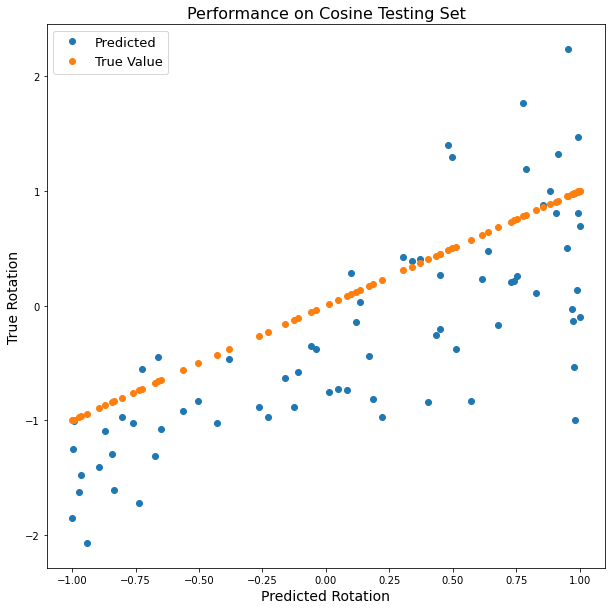

In [17]:
plt.figure(figsize=(10,10))
plt.plot(y_test, list(raw_predictions), 'o', label='Predicted', lw=3)
plt.plot(y_test, y_test, 'o', label='True Value', lw=3)
plt.ylabel("True Rotation", fontsize=14)
plt.xlabel("Predicted Rotation", fontsize=14)
plt.legend(fontsize=13)
plt.title("Performance on Cosine Testing Set", fontsize=16)
plt.show()

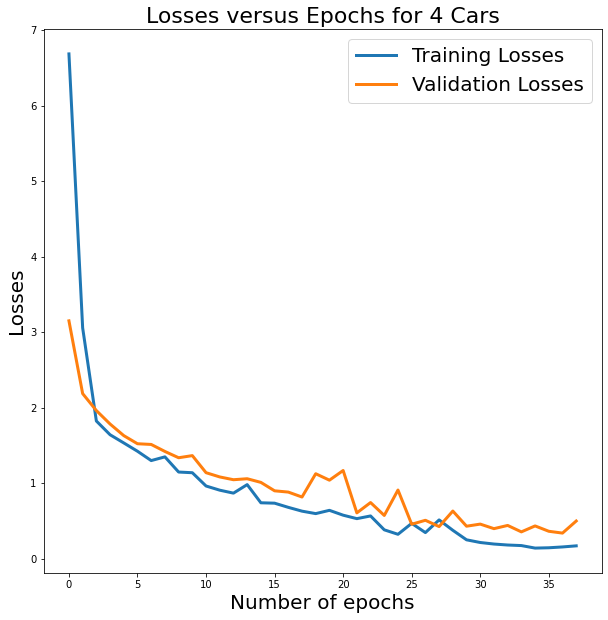

In [18]:
losses = history.history['loss'][2:]
val_losses = history.history['val_loss'][2:]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses)), losses, lw=3, label='Training Losses')
plt.plot(range(len(losses)), val_losses, lw=3, label='Validation Losses')
plt.ylabel("Losses", fontsize=20)
plt.xlabel("Number of epochs", fontsize=20)
plt.legend(fontsize=20)
plt.title("Losses versus Epochs for 4 Cars", fontsize=22)
plt.show()